In [1]:
import pandas as pd
df = pd.read_csv('https://cghub.ucsc.edu/reports/SUMMARY_STATS/LATEST_MANIFEST.tsv',
                 low_memory=False, sep='\t')

In [2]:
# Last time it's run:
import datetime
print(datetime.datetime.today().date())

2016-03-24


In [3]:
# only interested in those with state equals Live
ndf = df[(df.study == 'TCGA') & (df.library_type == 'RNA-Seq') & (df.state == 'Live')]

In [13]:
from misc.utils import count

## Library types

In [14]:
count(ndf, 'library_type')

,study,percent
library_type,,
RNA-Seq,25858,100.00%


## File types

In [15]:
count(ndf, 'file_type')

,study,percent
file_type,,
fasta,11374,43.99%
bam,14484,56.01%


## Diesase types

In [16]:
count(ndf, ['disease', 'disease_name'])

,,study,percent
disease,disease_name,,
CNTL,CONTROLS,2,0.01%
CHOL,CHOLANGIOCARCINOMA,90,0.35%
DLBC,LYMPHOID NEOPLASM DIFFUSE LARGE B-CELL LYMPHOMA,96,0.37%
UCS,UTERINE CARCINOSARCOMA,114,0.44%
ACC,ADRENOCORTICAL CARCINOMA,158,0.61%
UVM,UVEAL MELANOMA,160,0.62%
MESO,MESOTHELIOMA,174,0.67%
KICH,KIDNEY CHROMOPHOBE,182,0.70%
THYM,THYMOMA,244,0.94%


## Number of samples

In [17]:
ndf.shape[0]

25858

## File sizes

In [18]:
# Note: the count doesn't make sense when converting to filesize, so it's shown separately
from misc.utils import sizeof_fmt
# args: pass a sep character for better readbility. See sizeof_fmt?? for more details
ndf.files_size.describe().apply(sizeof_fmt, args=(' ',))

count     25.3 KB
mean       6.7 GB
std        3.4 GB
min      132.3 MB
25%        4.8 GB
50%        6.1 GB
75%        7.6 GB
max       45.5 GB
Name: files_size, dtype: object

#### Would be interesting to find out what the smallest and biggest files are

In [19]:
cols_to_show = ['disease_name', 'sample_type_name', 'filename', 'file_type',
                'files_size', 'files_size_readable', 'library_type', 'state']
# turn off warning, http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning
ndf.is_copy = False
ndf['files_size_readable'] = ndf.files_size.apply(sizeof_fmt)
sorted_ndf = ndf.sort_values('files_size').reset_index()
sorted_ndf.ix[[0,sorted_ndf.shape[0]-1]][cols_to_show]

,disease_name,sample_type_name,filename,file_type,files_size,files_size_readable,library_type,state
0,LUNG ADENOCARCINOMA,Primary solid Tumor,G92910.TCGA-44-2666-01A-01R-A46X-36.2.bam,bam,1.387423e+08,132.3 MB,RNA-Seq,Live
25857,COLON ADENOCARCINOMA,Primary solid Tumor,G92910.TCGA-A6-5656-01B-02R-A46X-36.2.bam,bam,4.888392e+10,45.5 GB,RNA-Seq,Live


## File sizes distribution

In [21]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
pd.set_option('display.width', 200)
pd.set_option('max_columns', 20)

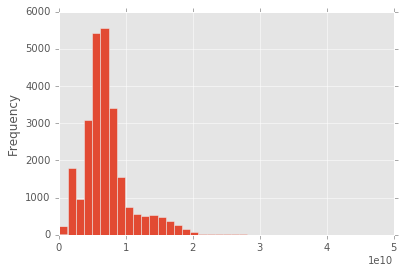

In [22]:
ndf.files_size.plot(kind='hist', bins=40)

In [23]:
sizeof_fmt(2e10)

'18.6 GB'

In [24]:
'{0:.2%}'.format(ndf[ndf.files_size > 2e10].shape[0] / float(ndf.shape[0]))

'0.66%'

So only 0.66% of the files are above 18.6 GB, and the majority are below.